## 📊Netflix Dataset EDA and Feature Engineering Project

This script performs comprehensive Exploratory Data Analysis (EDA) and Feature Engineering 
on the Netflix titles dataset to prepare it for machine learning models.




## 🎯 Business Problem Statement

In the competitive OTT streaming industry, customer retention is critical to sustained growth and profitability. Netflix, while popular, faces increasing churn due to content fatigue, irrelevant recommendations, and mistimed releases. This project aims to analyze existing show/movie data to uncover actionable insights that can enhance content recommendation, optimize release strategies, and identify popular genres — all to maximize customer retention.




## 🔍 Pain Points in the Current System

Lack of personalized recommendations: Shows/movies aren’t always matched to user preferences.

Suboptimal release timing: No analysis of when content performs best.

Genre fatigue or repetition: Over-representation of certain genres may cause user disengagement.


## ✅ How This Project Addresses It:

Genre analysis: Identifies top-performing genres based on time and festivities.

Release pattern trends: Examines when new content is added to identify optimal release windows.

Content feature enrichment: Helps build features (like content_age, genre_frequency, etc.) for better recommendation logic.


## 📊Why I chose this dataset:

I selected the Netflix Movies and TV Shows 2025 dataset because it provides a rich, real-world collection of entertainment data that reflects current global trends in streaming content. This dataset includes key features such as title, genre, director, cast, release year, country, and user ratings, which offer diverse opportunities for exploratory data analysis.

Netflix being a leading streaming platform with a massive global user base ensures that the patterns extracted from this data are highly relevant and applicable to modern digital media consumption. This dataset also presents practical challenges such as handling missing data and  feature engineering.

Project Flow:
1. Data Loading and Initial Exploration
2. Exploratory Data Analysis (EDA) 
3. Missing Value Treatment
4. Outlier Detection and Removal
5. Feature Encoding
6. Feature Engineering


Dataset: Netflix Titles Dataset (2015)

IMPORT NECESSARY LIBRARIES

In [1]:
import numpy as np          # For numerical operations and array handling
import pandas as pd         # For data manipulation and analysis
import seaborn as sns       # For statistical data visualization
import matplotlib.pyplot as plt  # For creating plots and charts

Load the Netflix dataset

First 5 rows of the dataset:


In [2]:
netflix_data=pd.read_csv(r'C:\ENDURE WORK\EDA AND FEATURE ENGINEERING\USECASE 1\DATA\netflix_titles.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Last 5 rows of the dataset

In [3]:
netflix_data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


INITIAL DATA EXPLORATION

In [4]:
#Checking for total size ,shape and dimensions
total_size=netflix_data.size
print(f'The total size of the dataset is {total_size}')

total_shape=netflix_data.shape
print(f'The total number of rows in the dataset is {total_shape[0]}')
print(f'The total number of columns in the dataset is {total_shape[1]}')


dimensions=netflix_data.ndim
print(f'The number of  dimensions of the  dataset is {dimensions}')

The total size of the dataset is 105684
The total number of rows in the dataset is 8807
The total number of columns in the dataset is 12
The number of  dimensions of the  dataset is 2


DATA TYPES AND MISSING VALUES OVERVIEW

In [5]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Key Observations from data info:
\
From this we find that few columns have missing values and the datatypes of 11 columns are objects whereas 1 column has integer datatype

UNIQUE VALUES ANALYSIS 

In [6]:

for col in netflix_data.columns:
    uni=netflix_data[col].nunique()
    print(f'{col} has {uni} unique values')

show_id has 8807 unique values
type has 2 unique values
title has 8807 unique values
director has 4528 unique values
cast has 7692 unique values
country has 748 unique values
date_added has 1767 unique values
release_year has 74 unique values
rating has 17 unique values
duration has 220 unique values
listed_in has 514 unique values
description has 8775 unique values


MISSING VALUES ANALYSIS

In [7]:
#Number of missing values per column
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

We found 6 columns having missing values and below are the names of the columns

In [8]:
null_column_names=netflix_data.columns[netflix_data.isnull().any()]
null_column_names


Index(['director', 'cast', 'country', 'date_added', 'rating', 'duration'], dtype='object')

DUPLICATE VALUES CHECK

In [9]:
total_duplicated_values=netflix_data.duplicated().sum()
total_duplicated_values


np.int64(0)

So, there are no duplicate rows in the dataset.

DATA TYPE CLASSIFICATION

In [10]:
#extracting numeric columns
numeric_col=netflix_data.select_dtypes(include='int').columns
numeric_col

Index(['release_year'], dtype='object')

In [11]:
#extarcting categorical columns
cat_col=netflix_data.select_dtypes(exclude='int').columns
cat_col

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

EXPLORATORY DATA ANALYSIS (EDA) - NUMERICAL COLUMNS

In [12]:
netflix_data[numeric_col].describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


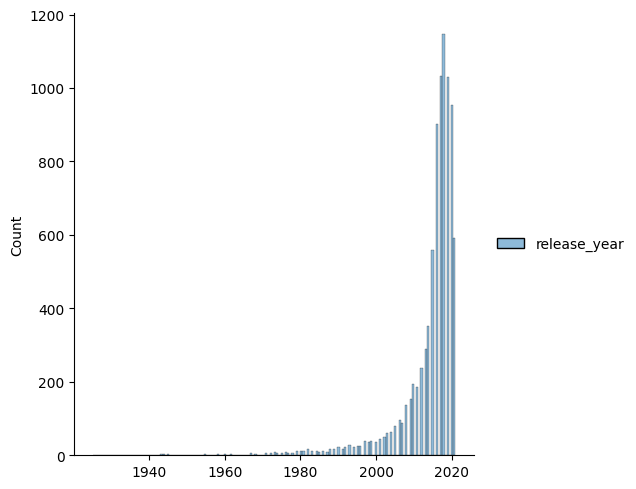

In [13]:

sns.displot(netflix_data[numeric_col])
plt.show()

Key Insight: The distribution is left-skewed, indicating most content is recent

 EXPLORATORY DATA ANALYSIS (EDA) - CATEGORICAL COLUMNS


In [14]:
#Finding unique values per column
for col in cat_col:
    unique_cat_values=netflix_data[col].nunique()
    print(f'{col} has {unique_cat_values} unique values')

show_id has 8807 unique values
type has 2 unique values
title has 8807 unique values
director has 4528 unique values
cast has 7692 unique values
country has 748 unique values
date_added has 1767 unique values
rating has 17 unique values
duration has 220 unique values
listed_in has 514 unique values
description has 8775 unique values


DETAILED ANALYSIS OF KEY CATEGORICAL COLUMNS

ANALYZING 'TYPE' COLUMN (Movie vs TV Show)

In [15]:
netflix_data['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

C:\Users\Jesilda\AppData\Local\Temp\ipykernel_8976\3376997353.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_data, x='type', palette='Set2')


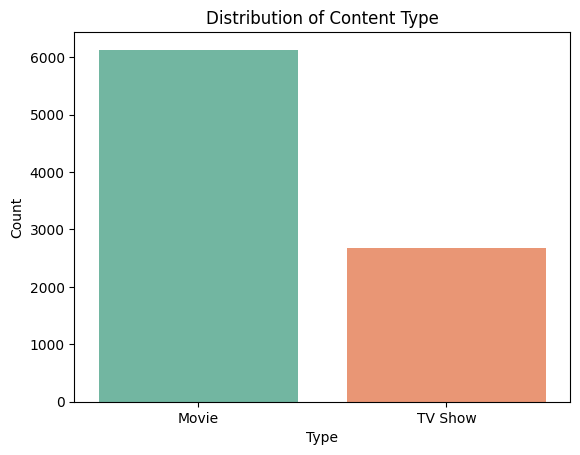

In [16]:
sns.countplot(data=netflix_data, x='type', palette='Set2')
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


Movies comprise of almost 70% of the content produced where as the other 30% is TV Shows

ANALYZING 'DIRECTOR' COLUMN

In [17]:
#Missing value count
netflix_data['director'].isnull().sum()

np.int64(2634)

Top 10 Directors by Number of Titles

In [18]:
top_directors=netflix_data['director'].value_counts().head(10)


C:\Users\Jesilda\AppData\Local\Temp\ipykernel_8976\1948396736.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Greens_r')


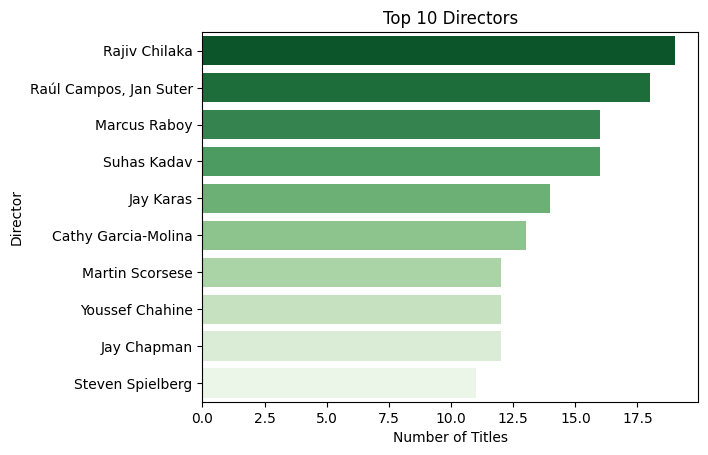

In [19]:
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Greens_r')
plt.title('Top 10 Directors')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

ANALYZING 'CAST' COLUMN

In [20]:
#Missing value count
netflix_data['cast'].isnull().sum()

np.int64(825)

Top 10 Cast Members by Number of Appearances

In [21]:
top_cast=netflix_data['cast'] \
    .dropna() \
    .str.split(',') \
    .explode() \
    .str.strip() \
    .value_counts() \
    .head(10)


C:\Users\Jesilda\AppData\Local\Temp\ipykernel_8976\2517313391.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cast.values, y=top_cast.index, palette='Oranges_r')


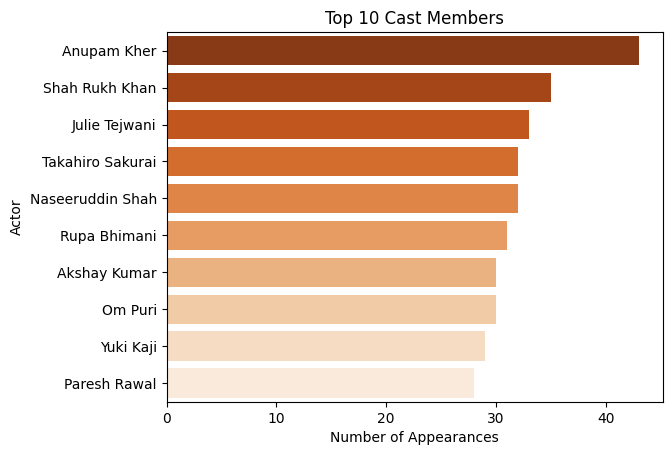

In [22]:
sns.barplot(x=top_cast.values, y=top_cast.index, palette='Oranges_r')
plt.title('Top 10 Cast Members')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.show()

ANALYZING 'COUNTRY' COLUMN

In [23]:
#Missing value count
netflix_data['country'].isnull().sum()

np.int64(831)

In [24]:
netflix_data['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

Top 10 Countries by Content Production

In [25]:
#10 frequently appearing countries
top_countries=netflix_data['country'] \
    .dropna() \
    .str.split(',') \
    .explode() \
    .str.strip() \
    .value_counts() \
    .head(10)

C:\Users\Jesilda\AppData\Local\Temp\ipykernel_8976\3060177083.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r')


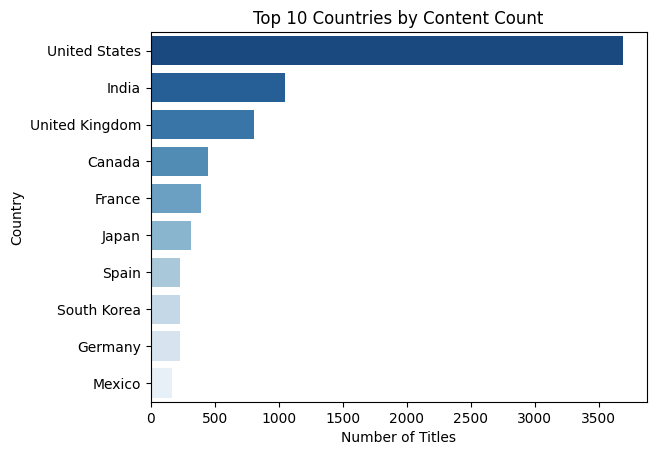

In [26]:
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r')
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

In [27]:
countries_with_highest_movies=netflix_data[netflix_data.type=='Movie']

In [28]:
countries_with_highest_TVShows=netflix_data[netflix_data.type=='TV Show']

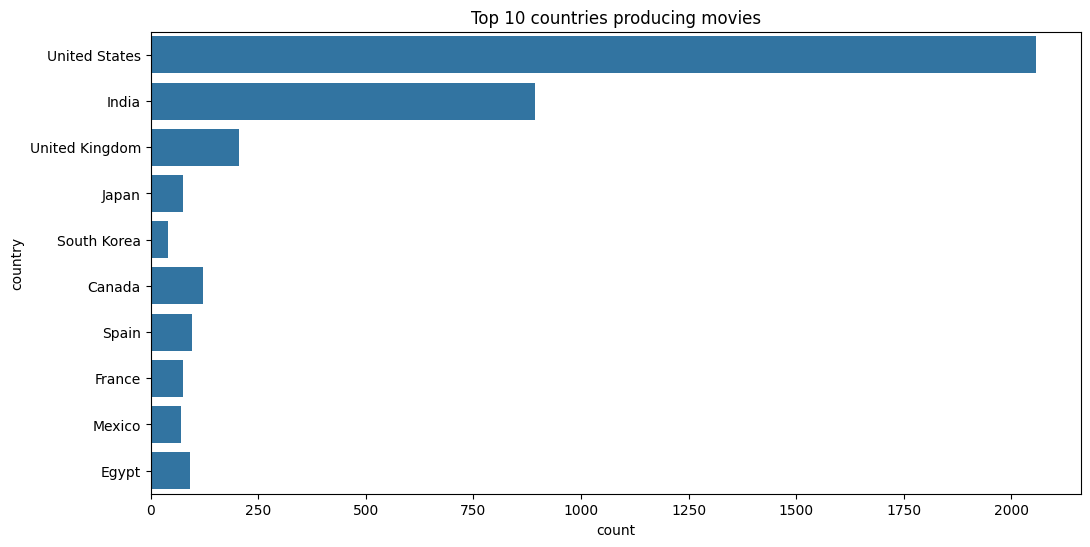

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(y='country',order=netflix_data['country'].value_counts().index[0:10],data=countries_with_highest_movies)
plt.title("Top 10 countries producing movies")
plt.show()

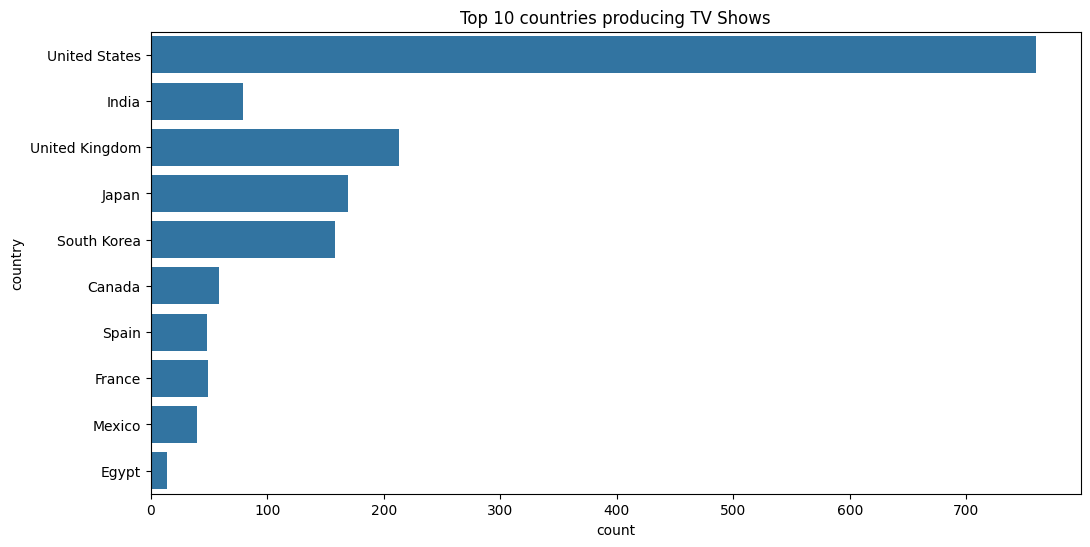

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(y='country',order=netflix_data['country'].value_counts().index[0:10],data=countries_with_highest_TVShows)
plt.title("Top 10 countries producing TV Shows")
plt.show()

The bar charts display the top 10 countries producing movies and TV shows on the platform. The United States leads by a significant margin in both categories, followed by India, which has a much stronger presence in movie production than in TV shows. Countries like the United Kingdom, Japan, and South Korea also contribute notably to both types of content.

ANALYZING 'RATING' COLUMN

In [31]:
#Missing value count
netflix_data['rating'].isnull().sum()

np.int64(4)

In [32]:
rating_order=netflix_data['rating'].value_counts()
rating_order

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [33]:
rating_order_index=rating_order=netflix_data['rating'].value_counts().index


C:\Users\Jesilda\AppData\Local\Temp\ipykernel_8976\2118611453.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_data, y='rating', order=rating_order_index, palette='Set3')


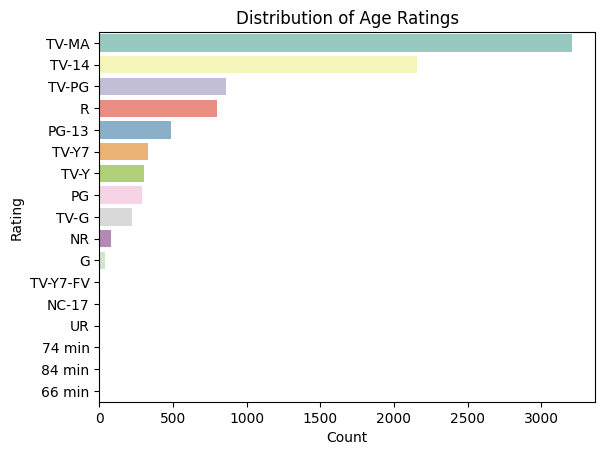

In [34]:
sns.countplot(data=netflix_data, y='rating', order=rating_order_index, palette='Set3')
plt.title('Distribution of Age Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


The bar chart shows the distribution of age ratings in the content library, with the majority of titles rated TV-MA and TV-14, indicating a strong focus on content for mature and teen audiences. Ratings like TV-PG, R, and PG-13 follow, while content suitable for young children, such as TV-Y, TV-G, and PG, appears far less frequently.

ANALYZING 'LISTED_IN' COLUMN

In [35]:
#Missing value count
netflix_data['listed_in'].isnull().sum()

np.int64(0)

In [36]:
netflix_data['listed_in'].value_counts()

listed_in
Dramas, International Movies                                  362
Documentaries                                                 359
Stand-Up Comedy                                               334
Comedies, Dramas, International Movies                        274
Dramas, Independent Movies, International Movies              252
                                                             ... 
Classic & Cult TV, TV Horror, TV Mysteries                      1
British TV Shows, TV Dramas, TV Sci-Fi & Fantasy                1
Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy      1
Comedies, Cult Movies, Sports Movies                            1
Cult Movies, Dramas, Thrillers                                  1
Name: count, Length: 514, dtype: int64

Top 10 Genres

In [37]:
top_genres = netflix_data['listed_in'] \
    .dropna() \
    .str.split(',') \
    .explode() \
    .str.strip() \
    .value_counts()[:10]


C:\Users\Jesilda\AppData\Local\Temp\ipykernel_8976\2107610092.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='Purples_r')


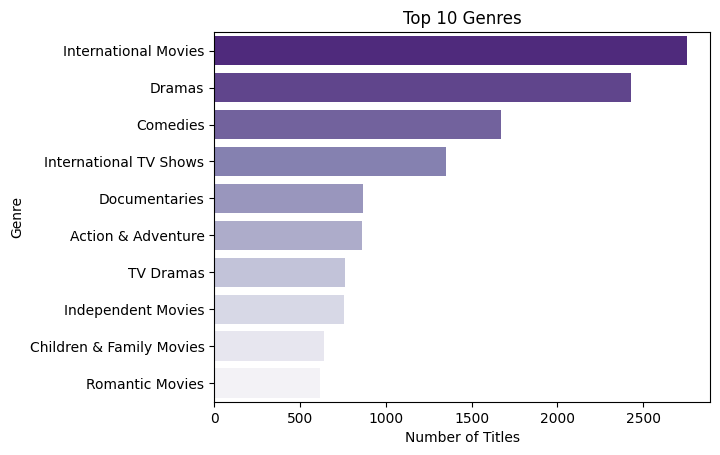

In [38]:

sns.barplot(x=top_genres.values, y=top_genres.index, palette='Purples_r')
plt.title('Top 10 Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

MISSING VALUE TREATMENT

Treating numerical columns

In [39]:
netflix_data['release_year'].fillna(netflix_data['release_year'].median(),inplace=True)


C:\Users\Jesilda\AppData\Local\Temp\ipykernel_8976\4129762391.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data['release_year'].fillna(netflix_data['release_year'].median(),inplace=True)


In [40]:

netflix_data['release_year'].isnull().sum()



np.int64(0)

All missing values fixed!

Treating categorical columns

In [41]:
netflix_data['director'].fillna('Unknown', inplace=True)

C:\Users\Jesilda\AppData\Local\Temp\ipykernel_8976\1587463589.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data['director'].fillna('Unknown', inplace=True)


In [42]:
netflix_data['cast'].fillna('Unknown', inplace=True)


C:\Users\Jesilda\AppData\Local\Temp\ipykernel_8976\1386869763.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data['cast'].fillna('Unknown', inplace=True)


In [43]:
netflix_data['country'] = netflix_data['country'].fillna('Unknown')

In [44]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], format='mixed', errors='coerce')
netflix_data = netflix_data.sort_values(by='date_added')

netflix_data['date_added'] = netflix_data['date_added'].fillna(method='ffill')


C:\Users\Jesilda\AppData\Local\Temp\ipykernel_8976\3532698720.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  netflix_data['date_added'] = netflix_data['date_added'].fillna(method='ffill')


In [45]:
netflix_data['rating'].fillna(netflix_data['rating'].mode()[0], inplace=True)


C:\Users\Jesilda\AppData\Local\Temp\ipykernel_8976\1349234761.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data['rating'].fillna(netflix_data['rating'].mode()[0], inplace=True)


In [46]:
netflix_data['listed_in'].fillna('Unknown', inplace=True)


C:\Users\Jesilda\AppData\Local\Temp\ipykernel_8976\202108073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data['listed_in'].fillna('Unknown', inplace=True)


In [47]:
netflix_data.loc[netflix_data['director']=='Louis C.K.','duration']=netflix_data['rating']

In [48]:
netflix_data.loc[[5541, 5794, 5813], 'rating'] = 'Unknown'


In [49]:
netflix_data.loc[netflix_data['director']=='Louis C.K.','rating']

5813    Unknown
5794    Unknown
5541    Unknown
Name: rating, dtype: object

In [50]:
netflix_data.loc[[5541, 5794, 5813], 'duration']

5541    74 min
5794    84 min
5813    66 min
Name: duration, dtype: object

In [51]:
netflix_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

OUTLIER DETECTION AND TREATMENT

Analyzing outliers in 'release_year' column

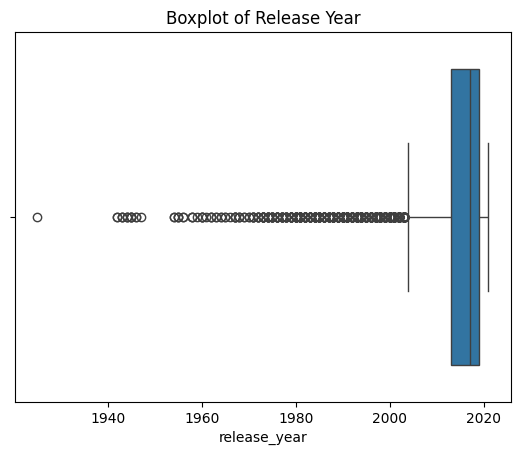

In [52]:
sns.boxplot(x=netflix_data['release_year'])
plt.title('Boxplot of Release Year')
plt.show()


In [53]:
Q1 = netflix_data['release_year'].quantile(0.25)
Q3 = netflix_data['release_year'].quantile(0.75)
IQR = Q3 - Q1

# Filtered dataset
netflix_data_cleaned = netflix_data[
    (netflix_data['release_year'] >= Q1 - 1.5 * IQR) &
    (netflix_data['release_year'] <= Q3 + 1.5 * IQR)
]


Analyzing outliers in 'release_year' column after outlier removal

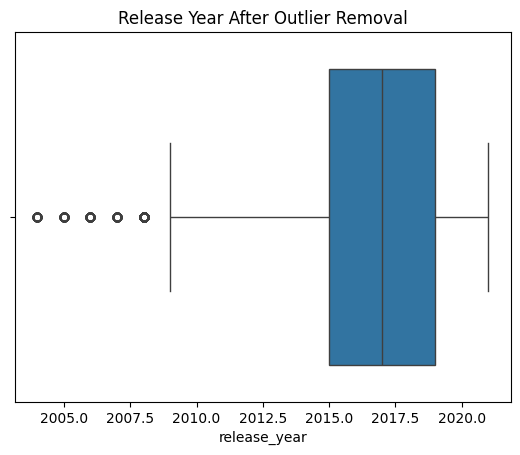

In [54]:
sns.boxplot(x=netflix_data_cleaned['release_year'])
plt.title('Release Year After Outlier Removal')
plt.show()


FEATURE ENCODING

ONE-HOT ENCODING for 'type' column

In [55]:
from sklearn.preprocessing import OneHotEncoder

type_ohe = OneHotEncoder(sparse_output=False, drop=None)
type_encoded = type_ohe.fit_transform(netflix_data_cleaned[['type']])

type_encoded_df = pd.DataFrame(type_encoded, columns=type_ohe.get_feature_names_out(['type']))

netflix_data_cleaned = pd.concat([netflix_data_cleaned, type_encoded_df], axis=1)


LABEL ENCODING for 'rating' column

In [56]:
from sklearn.preprocessing import LabelEncoder

le_rating = LabelEncoder()
netflix_data_cleaned['rating_encoded'] = le_rating.fit_transform(netflix_data_cleaned['rating'])


FEATURE ENGINEERING

Creating new features to enhance model performance

 TEMPORAL FEATURES from 'date_added'

Extract Year, Month, Day from date_added

In [57]:
# Ensure date_added is in datetime format
netflix_data_cleaned['date_added'] = pd.to_datetime(netflix_data_cleaned['date_added'])

# Extract year, month, and day name
netflix_data_cleaned['year_added'] = netflix_data_cleaned['date_added'].dt.year
netflix_data_cleaned['month_added'] = netflix_data_cleaned['date_added'].dt.month
netflix_data_cleaned['day_added'] = netflix_data_cleaned['date_added'].dt.day_name()


C:\Users\Jesilda\AppData\Local\Temp\ipykernel_8976\3205181916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_data_cleaned, x='month_added', palette='Spectral')


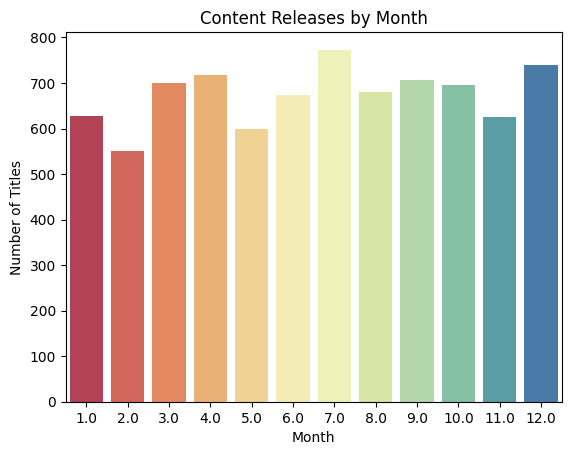

In [58]:
# Count of releases per month
sns.countplot(data=netflix_data_cleaned, x='month_added', palette='Spectral')
plt.title('Content Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.show()


Text(0, 0.5, 'Number of Titles')

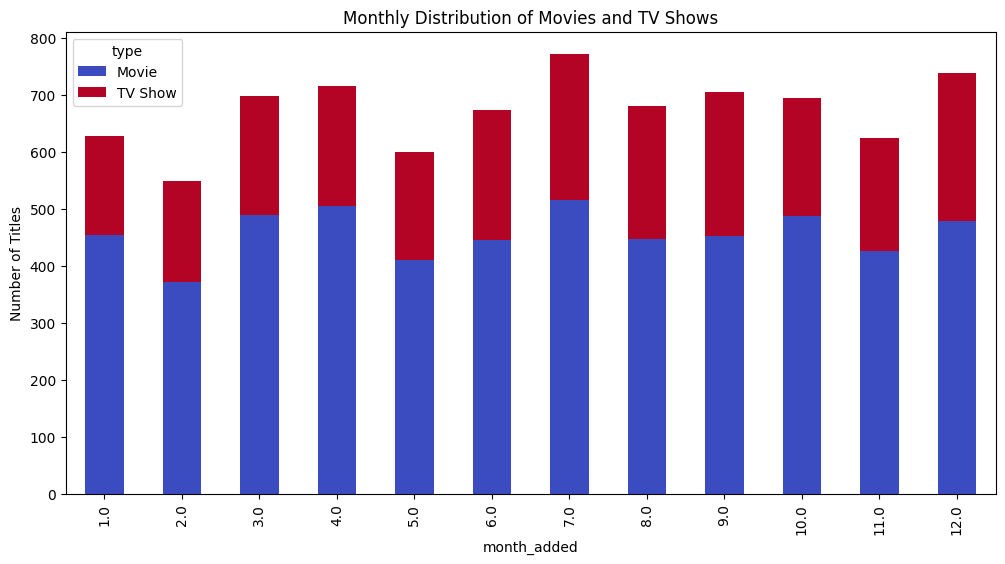

In [59]:
# Grouped by month and content type
monthly_type = netflix_data_cleaned.groupby(['month_added', 'type']).size().unstack()
monthly_type.plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.title('Monthly Distribution of Movies and TV Shows')
plt.ylabel('Number of Titles')


In [64]:
# Flag for weekend vs weekday
netflix_data_cleaned['is_weekend'] = netflix_data_cleaned['day_added'].isin(['Saturday', 'Sunday'])


Text(0.5, 1.0, 'Day of Week When Content Was Added')

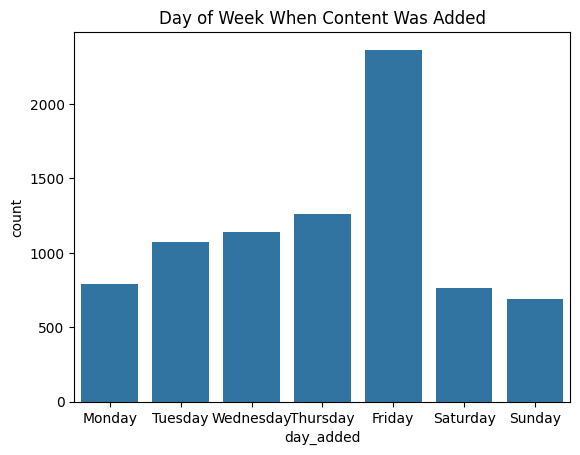

In [66]:
sns.countplot(x='day_added', data=netflix_data_cleaned, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.title('Day of Week When Content Was Added')


In [67]:
# Extract MM-DD format for easier holiday matching
netflix_data_cleaned['added_mmdd'] = netflix_data_cleaned['date_added'].dt.strftime('%m-%d')


In [68]:
holiday_dates = {
    'valentine': '02-14',
    'halloween': '10-31',
    'new_year': '01-01',
    'independence_us': '07-04',
    'christmas': '12-25'
}

for name, date in holiday_dates.items():
    netflix_data_cleaned[f'is_{name}'] = netflix_data_cleaned['added_mmdd'] == date


In [70]:
# Ensure 'listed_in' is not null
netflix_data_cleaned['listed_in'] = netflix_data_cleaned['listed_in'].fillna('Unknown')

# Extract main genre (first genre listed)
netflix_data_cleaned['main_genre'] = netflix_data_cleaned['listed_in'].apply(
    lambda x: x.split(',')[0].strip() if isinstance(x, str) else 'Unknown'
)


<Axes: xlabel='count', ylabel='main_genre'>

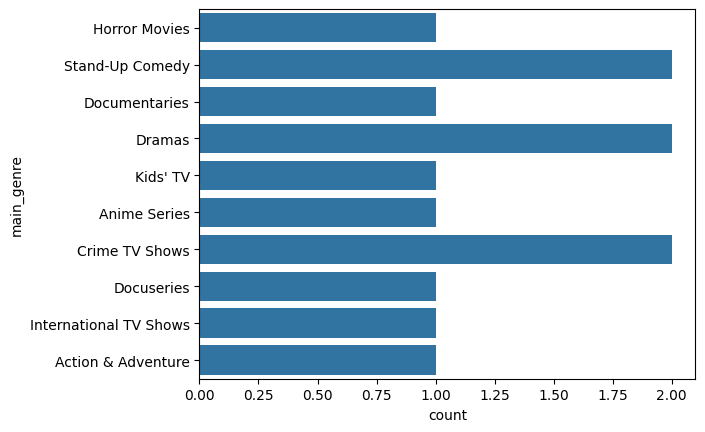

In [71]:
# Check genre trends around holidays
sns.countplot(data=netflix_data_cleaned[netflix_data_cleaned['is_halloween']], y='main_genre')


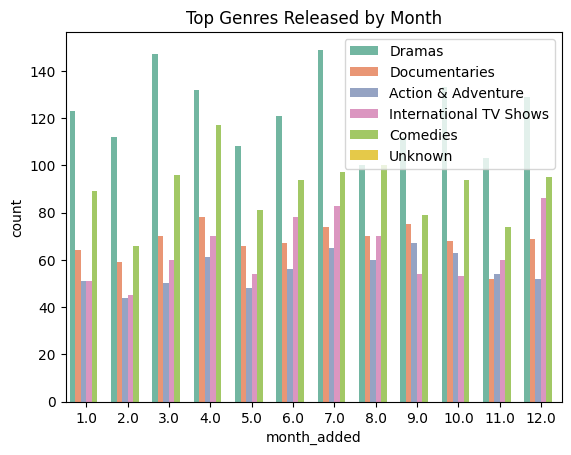

In [72]:
top_genres = netflix_data_cleaned['main_genre'].value_counts().head(6).index

filtered = netflix_data_cleaned[netflix_data_cleaned['main_genre'].isin(top_genres)]

sns.countplot(data=filtered, x='month_added', hue='main_genre', palette='Set2')
plt.title('Top Genres Released by Month')
plt.legend(loc='upper right')

In [73]:
# Create MM-DD format to match with holidays
netflix_data_cleaned['added_mmdd'] = netflix_data_cleaned['date_added'].dt.strftime('%m-%d')

# Holiday mapping
holiday_map = {
    'is_christmas': '12-25',
    'is_valentine': '02-14',
    'is_halloween': '10-31',
    'is_new_year': '01-01',
    'is_independence_us': '07-04'
}

# Add columns
for col, date in holiday_map.items():
    netflix_data_cleaned[col] = netflix_data_cleaned['added_mmdd'] == date



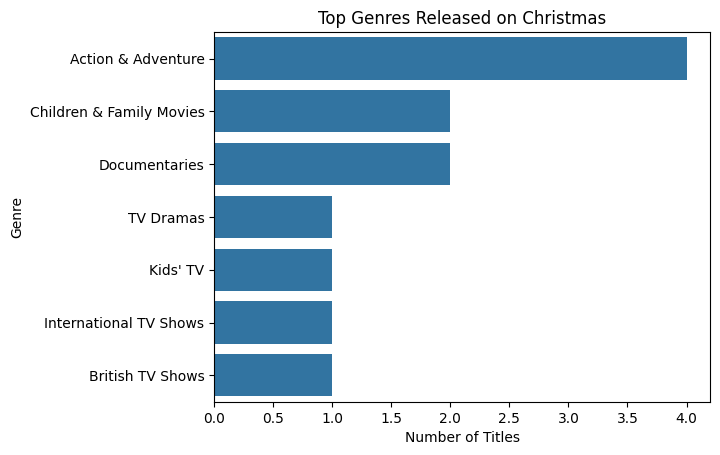

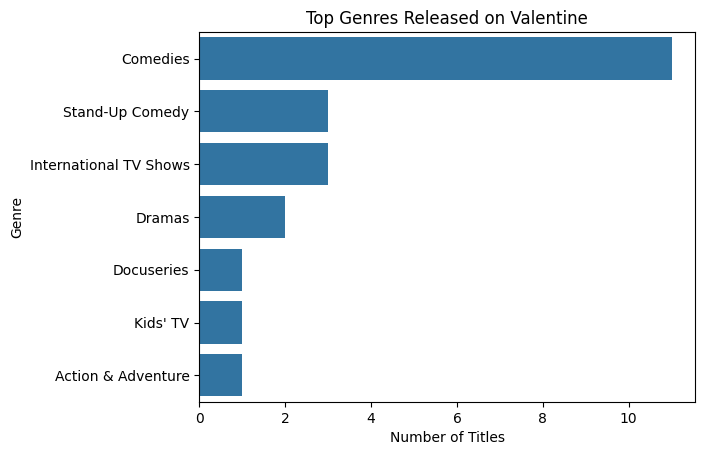

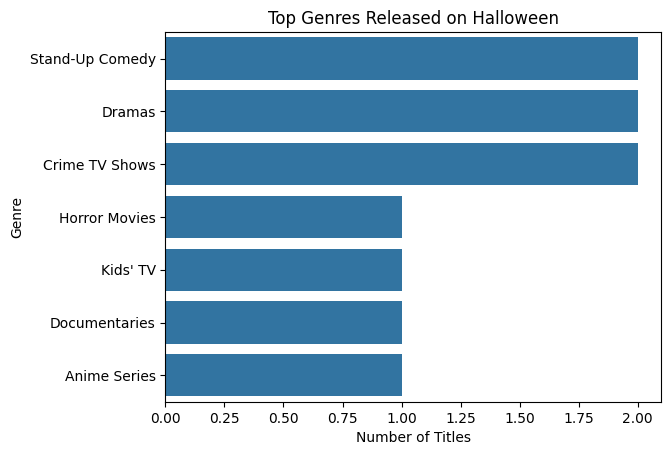

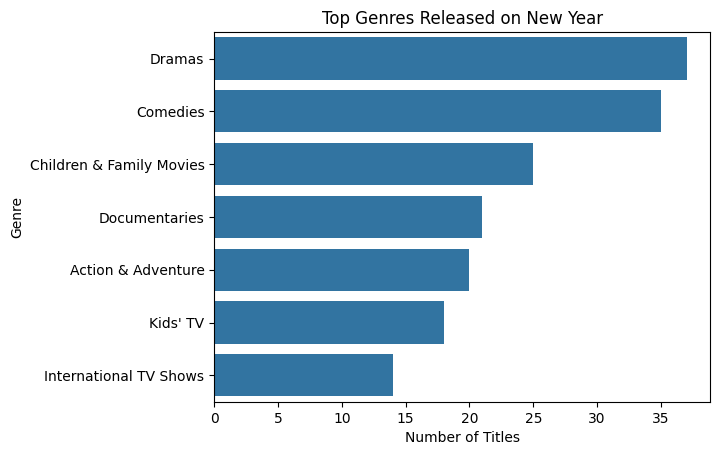

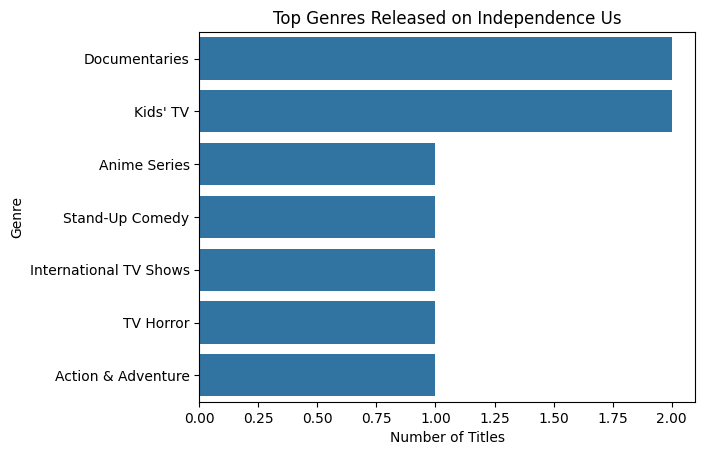

In [74]:
# Plot genre distribution for each holiday
for col in holiday_map.keys():
    holiday_name = col.replace('is_', '').replace('_', ' ').title()
    holiday_data = netflix_data_cleaned[netflix_data_cleaned[col]]
    if not holiday_data.empty:
        top_holiday_genres = holiday_data['main_genre'].value_counts().head(7)
        sns.barplot(y=top_holiday_genres.index, x=top_holiday_genres.values)
        plt.title(f'Top Genres Released on {holiday_name}')
        plt.xlabel('Number of Titles')
        plt.ylabel('Genre')
        plt.show()


In [76]:
netflix_data_cleaned['duration_num'] = netflix_data_cleaned['duration'].str.extract('(\d+)').astype(float)
netflix_data_cleaned['duration_type'] = netflix_data_cleaned['duration'].str.extract('([a-zA-Z ]+)$').fillna('Unknown')

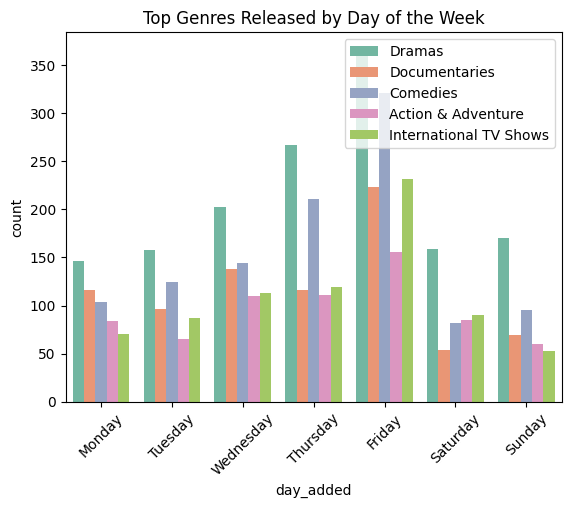

In [78]:
# Plot top 5 genres by day of the week
top_genres = netflix_data_cleaned['main_genre'].value_counts().head(5).index
filtered_genres = netflix_data_cleaned[netflix_data_cleaned['main_genre'].isin(top_genres)]

sns.countplot(data=filtered_genres, x='day_added', hue='main_genre',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
              palette='Set2')
plt.title('Top Genres Released by Day of the Week')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


# 📈 Netflix Content Strategy – Temporal & Genre Insights Analysis

## 1. Content Releases by Month

**Business Question**  
_When does Netflix release the most content?_

**Insight**  
Content release peaks occur in **July**, **April**, and **December**.

**Netflix Can Take Action**  
- Reserve **series and movies of mostly watched movie genres** for high-traffic months.
- Run seasonal campaigns like **"July Blockbusters"** and **"December Binge Fest"** maybe with some **discount during those months to attract more crowd**.

---

## 2. Monthly Distribution of Movies vs TV Shows

**Business Question**  
_Do Movies and TV Shows follow similar release patterns across months?_

**Insight**  
- **TV Shows spike** in **July**.
- **Movies** are more evenly released throughout the year.

**Netflix Can Take Action**  
- Launch **new show seasons mid-year** (July) when **binge-watching increases**.
- Use movies to **maintain engagement** year-round.


---

## 3. Day of the Week When Content is Added

**Business Question**  
_What days of the week are most common for adding content?_

**Insight**  
- **Fridays dominate**, followed by **Thursdays** and **Wednesdays**.
- **Weekends have the fewest additions**.

**Netflix Can Take Action**  
- Focus major launches on **Fridays** to capture **weekend binge traffic**.
- Use Thursdays for **"New Tomorrow" teasers** to build anticipation.

---

## 4. Top Genres on Netflix

**Business Question**  
_Which genres are most prevalent in Netflix’s content catalog?_

**Insight**  
- Top genres include **Dramas**, **Crime TV Shows**, and **Stand up Comedies**.

**Netflix Can Take Action**  
- Continue investing in **drama & crime series**, as they **retain viewers** well.
- Package documentary content into **mini-series** or **watchlists** to enhance experinece.

---

## 5. Top Genres Released by Month

**Business Question**  
_Do genre trends shift month to month?_

**Insight**  
- **Dramas are consistent** year-round.
- **Documentaries** spike in **April,July & October**.


**Netflix Can Take Action**  
- Promote **comedies and family films** around **holidays**.


---

## 6. Genre Distribution on Major Holidays

### 🎄 Christmas
**Insight**: Action, Family Movies, and Documentaries lead.
**Action**: Promote "**Holiday Adventures**" and "**Festive Family Picks**".

### 💘 Valentine’s Day
**Insight**: Comedies and Rom-Coms dominate.
**Action**: Curate "**Love & Laughs**" collections or "**Date Night Watchlists**".

### 🎃 Halloween
**Insight**: Dramas, Crime,Stand-Up Horror top the list.
**Action**: Run "**October Specials**" or "**True Crime Nights**".

### 🎉 New Year
**Insight**: Dramas and Comedies spike.
**Action**: Promote "**Fresh Starts**" and "**Laugh Into the New Year**" lists.

### 🇺🇸 Independence Day (US)
**Insight**: Documentaries and Kids’ content dominate.
**Action**: Push "**American Stories**", "**Family Fireworks Watchlists**".

---

## 7. Genre Distribution by Day of Week

**Business Question**  
_Which genres are released on which weekdays?_

**Insight**  
- **Dramas** have a high count mid week.
- **Comedies** count are higher around **Fridays**.
- **Documentaries** spread evenly.

**Netflix Can Take Action**  
- Create **weekly themed drops**, such as:
  - **Monday Mysteries** (Crime/Drama)
  - **Wednesday Docs** (Documentaries)
  - **Friday Fun Nights** (Comedy & Originals)

---

## ✅ Final Summary

Netflix can enhance customer retention by using insights on **time, genre, and user behavior** to drive:

- **Smarter content scheduling**
- **Seasonal genre alignment**
- **Weekly release patterns**
- **Holiday-specific programming**

These strategies help maximize watch time, boost satisfaction, and reduce churn — all critical to **retaining a global subscriber base**.


In [89]:
netflix_data_cleaned['main_genre'].unique()

array(['Dramas', 'Stand-Up Comedy & Talk Shows', 'Horror Movies',
       'Documentaries', 'Comedies', 'Children & Family Movies',
       'Crime TV Shows', 'TV Dramas', 'Stand-Up Comedy', 'Docuseries',
       'Action & Adventure', 'TV Comedies', 'Movies',
       'TV Action & Adventure', "Kids' TV", 'Romantic TV Shows',
       'British TV Shows', 'Classic & Cult TV', 'TV Horror',
       'International TV Shows', 'Anime Series', 'Music & Musicals',
       'International Movies', 'Thrillers', 'Reality TV',
       'Anime Features', 'Independent Movies', 'TV Sci-Fi & Fantasy',
       'TV Shows', 'Romantic Movies', 'Sci-Fi & Fantasy', 'Cult Movies',
       'Sports Movies', 'Classic Movies', 'Spanish-Language TV Shows',
       'LGBTQ Movies', 'Unknown'], dtype=object)

In [96]:
# Match genre to holiday-specific high-performing genres
netflix_data_cleaned['is_christmas_genre'] = netflix_data_cleaned.apply(
    lambda row: 1 if row['is_christmas'] and row['main_genre'] in ['Action & Adventure', 'Children & Family Movies', 'Documentaries','TV Dramas',"Kids' TV"] else 0,
    axis=1)

netflix_data_cleaned['is_valentine_genre'] = netflix_data_cleaned.apply(
    lambda row: 1 if row['is_valentine'] and row['main_genre'] in ['Comedies', 'Stand-Up Comedy', 'International TV Shows','Dramas'] else 0,
    axis=1)

netflix_data_cleaned['is_halloween_genre'] = netflix_data_cleaned.apply(
    lambda row: 1 if row['is_halloween'] and row['main_genre'] in ['Crime TV Shows', 'Horror Movies', 'Stand-Up Comedy','Horror Movies',"Kids' TV"] else 0,
    axis=1)

netflix_data_cleaned['is_newyear_genre'] = netflix_data_cleaned.apply(
    lambda row: 1 if row['is_new_year'] and row['main_genre'] in ['Dramas', 'Comedies', 'Children & Family Movies','Documentaries'] else 0,
    axis=1)

netflix_data_cleaned['is_independence_genre'] = netflix_data_cleaned.apply(
    lambda row: 1 if row['is_independence_us'] and row['main_genre'] in ['Documentaries', "Kids' TV", 'Anime Series','Stand-Up Comedy'] else 0,
    axis=1)


In [97]:
import pandas as pd

# Your DataFrame
# Let's assume it's called df

# List of festive genre indicator columns
festive_cols = [
    'is_christmas_genre',
    'is_valentine_genre',
    'is_halloween_genre',
    'is_newyear_genre',
    'is_independence_genre'
]

# STEP 1: Create 'is_rare_genre' where none of the festive genres are marked
netflix_data_cleaned['is_rare_genre'] = netflix_data_cleaned[festive_cols].sum(axis=1).apply(lambda x: 1 if x == 0 else 0)

# STEP 2: (Optional) Explore rare genres
# If you have a 'listed_in' or 'genres' column (assuming it's called 'listed_in')
if 'listed_in' in netflix_data_cleaned.columns:
    # Get unique genres for rare rows
    rare_genres = netflix_data_cleaned[netflix_data_cleaned['is_rare_genre'] == 1]['listed_in'].value_counts()
    

# 


In [102]:
netflix_data_cleaned.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type_Movie', 'type_TV Show', 'rating_encoded', 'year_added',
       'month_added', 'day_added', 'season', 'is_weekend', 'added_mmdd',
       'is_valentine', 'is_halloween', 'is_new_year', 'is_independence_us',
       'is_christmas', 'main_genre', 'duration_num', 'duration_type',
       'is_christmas_genre', 'is_valentine_genre', 'is_halloween_genre',
       'is_newyear_genre', 'is_independence_genre', 'is_rare_genre'],
      dtype='object')

## 🎯 Insight: Holiday-Sensitive Genre Mapping

With the creation of columns like `is_christmas_genre`, `is_valentine_genre`, `is_halloween_genre`, etc., we now have a granular view of how well each title's genre aligns with  global holidays.

### ✅ Actionable Insight
These features allow the model to:
- Identify **which titles are seasonally relevant**
- Help Netflix schedule and promote the **right genre at the right time**

### 💡 Example:
If a user logs in around February, titles with `is_valentine_genre = 1` can be **surfaced prominently**, improving both **engagement and retention**.


AGE-RELATED FEATURES:

 years_since_release Column

In [119]:
current_year = 2025  
netflix_data_cleaned['years_since_release'] = current_year - netflix_data_cleaned['release_year']


is_recent_release Flag (Release Year > 2019)

In [110]:
netflix_data_cleaned['is_recent_release'] = netflix_data_cleaned['release_year'] > 2019


In [111]:
def get_age_band(years_old):
    if years_old <= 1:
        return 'New'
    elif years_old <= 3:
        return 'Recent'
    elif years_old <= 10:
        return 'Moderate'
    else:
        return 'Classic'

netflix_data_cleaned['release_age_band'] = netflix_data_cleaned['years_since_release'].apply(get_age_band)


In [112]:
netflix_data_cleaned['is_vintage_popular'] = (
    (netflix_data_cleaned['years_since_release'] > 10) &
    (netflix_data_cleaned['main_genre'].isin(['Dramas', 'Documentaries']))
).astype(int)


## 🧠 Age-Based Features for Customer Retention

### 1. `release_age_band`

**Description**  
This feature categorizes content into age groups:
- `New` (≤1 year)
- `Recent` (1–3 years)
- `Moderate` (3–10 years)
- `Classic` (>10 years)

**📊 Why It Matters for Retention**  
- Allows Netflix to tailor recommendations by age preference.  
- For example, younger audiences may prefer `New` content, while some users revisit `Classic` titles for nostalgia.


---

### 2. `is_vintage_popular`

**Description**  
Flags content that is both:
- Older than 10 years (`Classic`)
- Belongs to genres like **Dramas** or **Documentaries**, which often perform well regardless of age.

**📊 Why It Matters for Retention**  
- Highlights **evergreen content** that holds long-term value.
- Netflix can promote these during low-release months or use them to **refresh the home feed** without relying on new inventory.

---

### ✅ Actionable Takeaway
These features help Netflix identify:
- Which content to recommend to **retain subscribers** across different user segments.
- When to **resurface older content** to boost engagement without producing new shows.


In [120]:
netflix_data_cleaned.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,is_christmas_genre,is_valentine_genre,is_halloween_genre,is_newyear_genre,is_independence_genre,is_rare_genre,years_since_release,release_age_band,is_vintage_popular,is_recent_release
5957,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,2006.0,TV-MA,81 min,...,0,0,0,1,0,0,19.0,New,0,False
6611,s6612,TV Show,Dinner for Five,Unknown,Unknown,United States,2008-02-04,2007.0,TV-MA,1 Season,...,0,0,0,0,0,1,18.0,New,0,False
5956,s5957,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,2007.0,TV-MA,104 min,...,0,0,0,0,0,1,18.0,New,0,False
5955,s5956,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,2009.0,TV-MA,29 min,...,0,0,0,0,0,1,16.0,New,0,False
5954,s5955,Movie,Even the Rain,Icíar Bollaín,"Luis Tosar, Gael García Bernal, Juan Carlos Ad...","Spain, Mexico, France",2011-05-17,2010.0,TV-MA,103 min,...,0,0,0,0,0,1,15.0,New,0,False


TEXT-BASED FEATURES

In [49]:
netflix_data_cleaned['title_word_count'] = netflix_data_cleaned['title'].fillna('').str.split().apply(len)
netflix_data_cleaned['description_len'] = netflix_data_cleaned['description'].fillna('').str.len()


CATEGORICAL COMPLEXITY FEATURES

 Multi-country production indicator


In [50]:
netflix_data_cleaned['is_multi_country'] = netflix_data_cleaned['country'].fillna('').str.contains(',')

Number of genres


In [51]:
netflix_data_cleaned['num_genres'] = netflix_data_cleaned['listed_in'].fillna('').apply(
    lambda x: len(x.split(',')) if x else 0
)

## 🎭 Genre Complexity Features

### 1. `num_genres`

**Description**  
Counts how many genres a show or movie is tagged with.

**📊 Why It Matters for Retention**  
- Titles with more genres may appeal to a **broader audience**, increasing watch probability.
- Single-genre titles are often more **focused and niche** — great for targeted recommendations.
- Helps understand how **content diversity** correlates with engagement and retention.

---


### ✅ Actionable Takeaway
These features allow Netflix to:
- Tailor recommendations to users who prefer **simple or mixed-genre content**
- Identify which **genre combinations lead to higher engagement**
- Decide how to **tag and present content** to increase appeal and rewatch value


DAYS-TO-NETFLIX FEATURE

In [52]:
netflix_data_cleaned['days_to_netflix'] = (netflix_data_cleaned['date_added'].dt.year - netflix_data_cleaned['release_year']) * 365


FINAL DATASET SUMMARY

In [127]:
netflix_data_cleaned.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,is_christmas_genre,is_valentine_genre,is_halloween_genre,is_newyear_genre,is_independence_genre,is_rare_genre,years_since_release,release_age_band,is_vintage_popular,is_recent_release
5957,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,2006.0,TV-MA,81 min,...,0,0,0,1,0,0,19.0,New,0,False
6611,s6612,TV Show,Dinner for Five,Unknown,Unknown,United States,2008-02-04,2007.0,TV-MA,1 Season,...,0,0,0,0,0,1,18.0,New,0,False
5956,s5957,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,2007.0,TV-MA,104 min,...,0,0,0,0,0,1,18.0,New,0,False
5955,s5956,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,2009.0,TV-MA,29 min,...,0,0,0,0,0,1,16.0,New,0,False
5954,s5955,Movie,Even the Rain,Icíar Bollaín,"Luis Tosar, Gael García Bernal, Juan Carlos Ad...","Spain, Mexico, France",2011-05-17,2010.0,TV-MA,103 min,...,0,0,0,0,0,1,15.0,New,0,False


In [125]:
netflix_data_cleaned.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type_Movie', 'type_TV Show', 'rating_encoded', 'year_added',
       'month_added', 'day_added', 'season', 'is_weekend', 'added_mmdd',
       'is_valentine', 'is_halloween', 'is_new_year', 'is_independence_us',
       'is_christmas', 'main_genre', 'duration_num', 'duration_type',
       'is_christmas_genre', 'is_valentine_genre', 'is_halloween_genre',
       'is_newyear_genre', 'is_independence_genre', 'is_rare_genre',
       'years_since_release', 'release_age_band', 'is_vintage_popular',
       'is_recent_release'],
      dtype='object')

In [126]:
print(f"Final dataset dimensions: {netflix_data_cleaned.shape}")
print(f"Total features created: {netflix_data_cleaned.shape[1] - netflix_data.shape[1]} new features")


Final dataset dimensions: (8703, 39)
Total features created: 27 new features


THIS IS THE FINAL CLEANED DATASET

INSIGHTS SUMMARY:
1. Netflix heavily favors movies over TV shows in their catalog
2. While US content dominates the platform, significant representation from India, UK, and Canada reveals Netflix's strategic global content
3. TV-MA and TV-14 ratings dominate the rating distribution
4. High missing values in director and cast columns suggest systematic data collection gaps
5. Multi-country productions and varying genre counts suggest Netflix invests in sophisticated, cross-cultural content.
6. The distribution of the release_year data is left-skewed, indicating most content is recent.
7. USA leads in both movies and TV Show content type, whereas India is second in line for  movies and UK is second in line for TV Shows.
8. International movies leads followed by Dramas and Comedies in the Genre category.
9. Creating features like year_added,month_added,years_since_release,is_multicountry are helpful in modelling